## Jupyter noteboook - Iris flower data set.

### Iris flower data set
Iris data set is a outcome set of multitude variables of mesurements, which makes it a numerical continuous data set. Edgar Anderson (*1897 - †1969) was a geneticist who collected the data to quantify the morphologic variation of Iris flower of three related species. The data set consist of 50 samples from each of the three species of Iris flower. Four features were measured from each sample. These were the lenght of the sepals and petals and width of sepals and petals. All measurements are in centimeteres. Edgar used these measurements to develop a linear discrimination model to disnquish the species from each other. Data set is ofter reffered as Anderson's Iris data set because of Edgars Anderson.  

<img src=https://raw.githubusercontent.com/MartinRep/FishersIris/master/Assets/Iris_setosa.jpg align="left" alt="Iris Setosa">
<img src=https://raw.githubusercontent.com/MartinRep/FishersIris/master/Assets/Iris_virginica.jpg align="right" alt="Iris Virginica">
<img src=https://raw.githubusercontent.com/MartinRep/FishersIris/master/Assets/Iris_versicolor.jpg align="middle" alt="Iris Versicolor">

[Data Set](http://mlr.cs.umass.edu/ml/machine-learning-databases/iris/iris.data)

### Simple plot
This plot is showing sepal lenght vs sepal width.

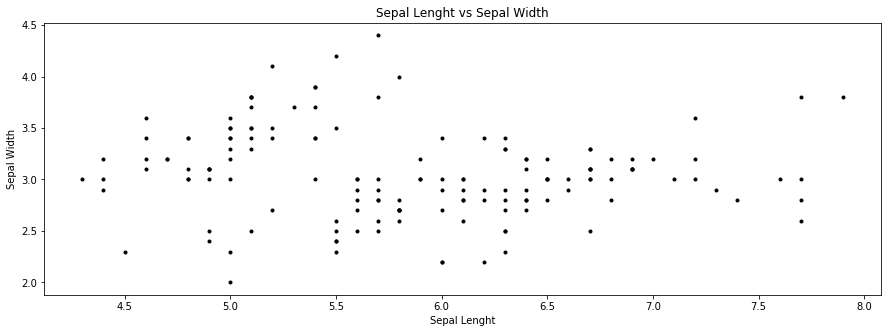

In [1]:
# Adapted from http://nbviewer.jupyter.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/01%20-%20Lesson.ipynb
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15.0, 5.0) # Setting up the plots default size
iris_data = pd.read_csv('irisdataset.csv', header=None) # Using pandas library to read data
s_lenght, s_width, p_lenght, p_width, iris_type = iris_data[0], iris_data[1], iris_data[2], iris_data[3], iris_data[4]
plt.plot(s_lenght, s_width, 'k.') # Specifinig only sedal lenght and sedal width
plt.xlabel('Sepal Lenght')
plt.ylabel('Sepal Width')
plt.title('Sepal Lenght vs Sepal Width')
plt.show()

### Colored more complex plot
This plot is color coded and data is separated by the flower type

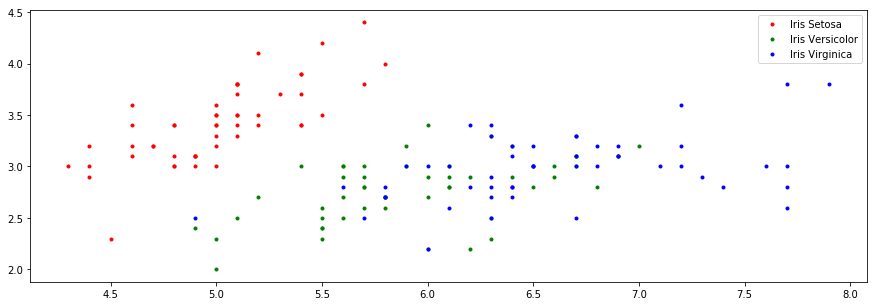

In [2]:
plt.plot(s_lenght[0:50], s_width[0:50], 'r.', label='Iris Setosa')
plt.plot(s_lenght[50:100], s_width[50:100], 'g.', label='Iris Versicolor')
plt.plot(s_lenght[100:], s_width[100:], 'b.', label='Iris Virginica')
plt.legend()
plt.show()